<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>

The dataset for this project belongs to the <a href="https://torob.com/" target="_blank">Torob</a> website, containing a portion of the real data from this website. Torob is a shopping search engine that aggregates information about each product from various online stores and displays it on a unified page. Therefore, users will be able to easily find their desired product and compare it among different sellers. One of the most critical technical requirements for such a platform is automatic product information extraction, as manual refinement of this volume of data would be very time-consuming and costly. Perhaps the most crucial information for such a platform is product categorization, as it plays a significant role in its searchability. Hence, in this project, we are designing a deep learning model that can classify a product based on its image.

Due to the large size of the dataset, you need to download it separately from this[ link](https://drive.google.com/file/d/1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-/view?usp=sharing) and extract the files inside. Please note that the dataset size is approximately 270 megabytes. If you prefer not to download such a large amount of data, we recommend using Google Colab to directly download the file using the following command:

```python
!gdown 1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-
```

The dataset for this project includes 11 categories of different products. The images related to training samples for each category are placed within folders named corresponding to their category IDs under the `train` directory. Additionally, the images for test samples are located in the `test` directory. Your model should be capable of taking any of these images as input and correctly identifying their respective category.

The categories and their corresponding IDs are listed in the table below:

| **Category ID** | **Category Title** |
| :---: | :---: |
| `0` | Men's Jackets, Raincoats, and Overcoats |
| `1` | Men's Sweatshirts and Hoodies |
| `2` | Analog and Digital Watches |
| `3` | Wall Clocks, Desk Clocks, and Decorative Clocks |
| `4` | Regular and Smart Watch Accessories |
| `5` | Kids' and Teens' Sweatshirts and Hoodies |
| `6` | Kids' and Teens' Jackets and Overcoats |
| `7` | Men's Sports Sweatshirts |
| `8` | Men's Sports Sweatshirts and Pants |
| `9` | Shopping Bags and Trolleys |
| `10` | Suitcases and Bags |

In [2]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [3]:
!gdown 1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-

Downloading...
From (original): https://drive.google.com/uc?id=1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-
From (redirected): https://drive.google.com/uc?id=1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-&confirm=t&uuid=4cf49084-55d9-4d92-97a0-ade140cdaee2
To: /content/data.zip
100% 272M/272M [00:08<00:00, 31.0MB/s]


In [4]:
!unzip -qq data.zip

In [5]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [6]:
import keras
print(keras.__version__)

3.4.1


In [7]:
import pandas as pd
import numpy as np

In [8]:
# Reading/Loading the dataset files

from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory='./train/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset='training'
)
class_names = train_dataset.class_names
val_dataset = image_dataset_from_directory(
    directory='./train/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset='validation'
)

Found 8829 files belonging to 11 classes.
Using 7947 files for training.
Found 8829 files belonging to 11 classes.
Using 882 files for validation.


In [9]:
class_names

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
# Preprocessing step

from keras.applications.resnet50 import preprocess_input

# Preprocess the data (these are images)
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

In [11]:
# Model design

model = keras.applications.ResNet50(input_shape= (224, 224, 3),
                                      classes= 11,
                                      weights= 'imagenet',
                                      include_top= False,
                                      pooling= 'avg'
                                      )
model.trainable = False
x = keras.layers.Flatten()(model.output)
x = keras.layers.Dense(128,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(11, activation='softmax')(x)
model = keras.models.Model(model.input, x)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,858,955 (91.01 MB)

 Trainable params: 271,243 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.keras", save_best_only=True, monitor="val_loss")

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

initial_learning_rate = 0.001

def scheduler(epoch, lr):
    if epoch % 10 == 0:
        return lr * 0.9
    else:
        return lr

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=40, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 71s 206ms/step - accuracy: 0.5143 - loss: 1.4268 - val_accuracy: 0.8209 - val_loss: 0.5473
Epoch 2/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.7677 - loss: 0.6991 - val_accuracy: 0.8277 - val_loss: 0.4806
Epoch 3/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.8004 - loss: 0.6019 - val_accuracy: 0.8333 - val_loss: 0.4691
Epoch 4/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.8283 - loss: 0.5319 - val_accuracy: 0.8458 - val_loss: 0.4441
Epoch 5/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.8404 - loss: 0.4703 - val_accuracy: 0.8458 - val_loss: 0.4390
Epoch 6/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.8523 - loss: 0.4447 - val_accuracy: 0.8469 - val_loss: 0.4369
Epoch 7/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8668 - loss: 0.3955 - val_accuracy: 0.8594 - val_loss: 0.4574
Epoch 8/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.8722 - loss: 0

In [15]:
best_model = keras.models.load_model("model.keras")

In [16]:
# Evaluate
best_model.evaluate(val_dataset)

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.8782 - loss: 0.4398


[0.43251872062683105, 0.8673469424247742]

In [17]:
test_dataset = image_dataset_from_directory(
    directory='./test/',
    label_mode=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)
image_names = [img.split('/')[-1] for img in test_dataset.file_paths]
test_dataset = test_dataset.map(lambda x: preprocess_input(x))

Found 1201 files.


In [18]:
predictions = best_model.predict(test_dataset)

38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 288ms/step


In [19]:
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [20]:
submission = pd.DataFrame(columns=['image_name', 'cat_id'])
submission['image_name'] = image_names
submission['cat_id'] = predictions
submission

,image_name,cat_id
0,-56lhw2AKjYI0Hnt.jpg,0
1,-6OdHXCBItIArPyk.jpg,2
2,-7241lsvPiVpNVFV.jpg,9
3,-8-0wltLEZBDTM5M.jpg,9
4,-GcrzANWUmrjk2tb.jpg,0
...,...,...
1196,zNIgOhLGUPCyp7vl.jpg,2
1197,zhzjJeI8FwQDZQCE.jpg,1
1198,zizDow_ExDVnz9QS.jpg,2
1199,znpJGKcXxvmOU_nK.jpg,0


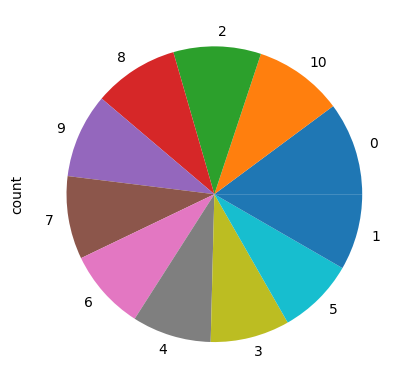

In [21]:
from matplotlib import pyplot as plt
submission['cat_id'].value_counts().plot.pie()
plt.show()